# Will the Telecom Customer Churn?- A Classification Analysis

# Author: Soumik Karmakar

## Context:

Data on customer behavior can provide valuable insights on future decisionsmade by a customer. Churn prediction models, for instance, identify customers”who stop using a product or service”. This is of high interest to productproviders since a large number of churning customers not only leads to a loss ofrevenue but can also have a negative impact on a company’s reputation.

We shall carry out our whole analysis in R. So we need to load some libraries,-

In [1]:
library(ggplot2)
library(leaps)
library(caret)
library(car)
library(corrplot)
library(tree)
library(MASS)
library(randomForest)
library(pROC)
library(tibble)
library(cvms)
library(e1071)

Loading required package: lattice

Loading required package: carData

corrplot 0.89 loaded

randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.


Attaching package: 'randomForest'


The following object is masked from 'package:ggplot2':

    margin


Type 'citation("pROC")' for a citation.


Attaching package: 'pROC'


The following objects are masked from 'package:stats':

    cov, smooth, var




##  Data Content:

In [8]:
df <- read.csv("E:/IIT Kanpur/Self Project/Project_data.csv.csv")
head(df)
dim(df)
str(df)
n <- nrow(df)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,...,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>
1,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
2,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
5,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
6,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes


[1] 7043   21

'data.frame':	7043 obs. of  21 variables:
 $ customerID      : chr  "7590-VHVEG" "5575-GNVDE" "3668-QPYBK" "7795-CFOCW" ...
 $ gender          : chr  "Female" "Male" "Male" "Male" ...
 $ SeniorCitizen   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Partner         : chr  "Yes" "No" "No" "No" ...
 $ Dependents      : chr  "No" "No" "No" "No" ...
 $ tenure          : int  1 34 2 45 2 8 22 10 28 62 ...
 $ PhoneService    : chr  "No" "Yes" "Yes" "No" ...
 $ MultipleLines   : chr  "No phone service" "No" "No" "No phone service" ...
 $ InternetService : chr  "DSL" "DSL" "DSL" "DSL" ...
 $ OnlineSecurity  : chr  "No" "Yes" "Yes" "Yes" ...
 $ OnlineBackup    : chr  "Yes" "No" "Yes" "No" ...
 $ DeviceProtection: chr  "No" "Yes" "No" "Yes" ...
 $ TechSupport     : chr  "No" "No" "No" "Yes" ...
 $ StreamingTV     : chr  "No" "No" "No" "No" ...
 $ StreamingMovies : chr  "No" "No" "No" "No" ...
 $ Contract        : chr  "Month-to-month" "One year" "Month-to-month" "One year" ...
 $ PaperlessBilling: chr  "Yes"

We have 7043 rows and 21 columns. Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

The data set includes information about:

Customers who left within the last month – the column is called Churn
Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
Demographic info about customers – gender, age range, and if they have partners and dependents

##  Data Preprocessing:

We see that, the id column will not help us in our analysis, so we remove thatcolumn from our dataset.

In [9]:
colnames(df)
df <- df[-which(colnames(df) == 'customerID')]
head(df)

[1] "customerID"       "gender"           "SeniorCitizen"    "Partner"         
 [5] "Dependents"       "tenure"           "PhoneService"     "MultipleLines"   
 [9] "InternetService"  "OnlineSecurity"   "OnlineBackup"     "DeviceProtection"
[13] "TechSupport"      "StreamingTV"      "StreamingMovies"  "Contract"        
[17] "PaperlessBilling" "PaymentMethod"    "MonthlyCharges"   "TotalCharges"    
[21] "Churn"

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
,<chr>,<int>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>
1,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
2,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
5,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
6,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes


*  **Missing Value Imputation:**

In [10]:
df$TotalCharges <- as.numeric(df$TotalCharges)
miss = which(is.na(df$TotalCharges) == TRUE)
miss

[1]  489  754  937 1083 1341 3332 3827 4381 5219 6671 6755

We can see that there are missing values in the data. So, we replace those missing values by replacing them with the median of the respective columns.

In [11]:
df$TotalCharges[miss] <- median(df$TotalCharges, na.rm = TRUE) 
str(df)
sum(is.na(df))

'data.frame':	7043 obs. of  20 variables:
 $ gender          : chr  "Female" "Male" "Male" "Male" ...
 $ SeniorCitizen   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Partner         : chr  "Yes" "No" "No" "No" ...
 $ Dependents      : chr  "No" "No" "No" "No" ...
 $ tenure          : int  1 34 2 45 2 8 22 10 28 62 ...
 $ PhoneService    : chr  "No" "Yes" "Yes" "No" ...
 $ MultipleLines   : chr  "No phone service" "No" "No" "No phone service" ...
 $ InternetService : chr  "DSL" "DSL" "DSL" "DSL" ...
 $ OnlineSecurity  : chr  "No" "Yes" "Yes" "Yes" ...
 $ OnlineBackup    : chr  "Yes" "No" "Yes" "No" ...
 $ DeviceProtection: chr  "No" "Yes" "No" "Yes" ...
 $ TechSupport     : chr  "No" "No" "No" "Yes" ...
 $ StreamingTV     : chr  "No" "No" "No" "No" ...
 $ StreamingMovies : chr  "No" "No" "No" "No" ...
 $ Contract        : chr  "Month-to-month" "One year" "Month-to-month" "One year" ...
 $ PaperlessBilling: chr  "Yes" "No" "Yes" "No" ...
 $ PaymentMethod   : chr  "Electronic check" "Mailed check" "

[1] 0

Now, there are no missing values in our dataset.

Now, we change the "No Service" column to "No" for simplicity.

In [13]:
for(i in (which(colnames(df) == 'OnlineSecurity') : which(colnames(df) == 'StreamingMovies'))){
  df[i] <- as.factor(ifelse(df[i] != 'Yes', 'No', 'Yes'))
}
df$InternetService <- as.factor(ifelse(df$InternetService != 'No', 'Yes', 'No'))
df$MultipleLines <- as.factor(ifelse(df$MultipleLines != 'Yes', 'No', 'Yes'))
df$SeniorCitizen <- as.factor(df$SeniorCitizen)

for(i in 1:ncol(df)){
  if(class(df[,i]) == 'character'){
    df[,i] <- as.factor(df[,i])
  }
}
str(df)

'data.frame':	7043 obs. of  20 variables:
 $ gender          : Factor w/ 2 levels "Female","Male": 1 2 2 2 1 1 2 1 1 2 ...
 $ SeniorCitizen   : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ Partner         : Factor w/ 2 levels "No","Yes": 2 1 1 1 1 1 1 1 2 1 ...
 $ Dependents      : Factor w/ 2 levels "No","Yes": 1 1 1 1 1 1 2 1 1 2 ...
 $ tenure          : int  1 34 2 45 2 8 22 10 28 62 ...
 $ PhoneService    : Factor w/ 2 levels "No","Yes": 1 2 2 1 2 2 2 1 2 2 ...
 $ MultipleLines   : Factor w/ 2 levels "No","Yes": 1 1 1 1 1 2 2 1 2 1 ...
 $ InternetService : Factor w/ 2 levels "No","Yes": 2 2 2 2 2 2 2 2 2 2 ...
 $ OnlineSecurity  : Factor w/ 2 levels "No","Yes": 1 2 2 2 1 1 1 2 1 2 ...
 $ OnlineBackup    : Factor w/ 2 levels "No","Yes": 2 1 2 1 1 1 2 1 1 2 ...
 $ DeviceProtection: Factor w/ 2 levels "No","Yes": 1 2 1 2 1 2 1 1 2 1 ...
 $ TechSupport     : Factor w/ 2 levels "No","Yes": 1 1 1 2 1 1 1 1 2 1 ...
 $ StreamingTV     : Factor w/ 2 levels "No","Yes": 1 1 1 1 1 2 

* **Exploratory Data Analysis:**

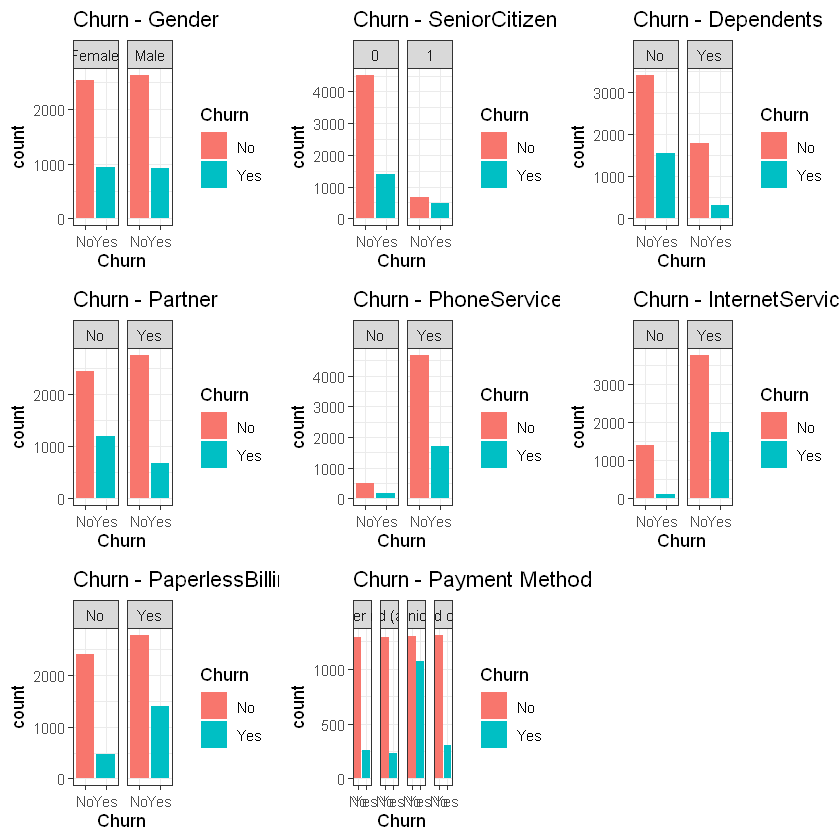

In [16]:
p1 <- ggplot(df, aes(x = Churn, fill = Churn)) +facet_grid(~gender)+ geom_bar() +ggtitle("Churn - Gender") + theme_bw()
p2 <- ggplot(df, aes(x = Churn, fill = Churn)) +facet_grid(~SeniorCitizen)+ geom_bar() + ggtitle("Churn - SeniorCitizen") + theme_bw()
p3 <- ggplot(df, aes(x = Churn, fill = Churn)) +facet_grid(~Dependents)+ geom_bar() + ggtitle("Churn - Dependents") + theme_bw()
p4 <- ggplot(df, aes(x = Churn, fill = Churn)) +facet_grid(~Partner)+ geom_bar() + ggtitle("Churn - Partner") + theme_bw()
p5 <- ggplot(df, aes(x = Churn, fill = Churn)) +facet_grid(~PhoneService)+ geom_bar() + ggtitle("Churn - PhoneService")+ theme_bw()
p6 <- ggplot(df, aes(x = Churn, fill = Churn)) +facet_grid(~InternetService)+ geom_bar() + ggtitle("Churn - InternetService") + theme_bw()
p7 <- ggplot(df, aes(x = Churn, fill = Churn)) +facet_grid(~PaperlessBilling)+ geom_bar() + ggtitle("Churn - PaperlessBilling") + theme_bw()
p8 <- ggplot(df, aes(x = Churn, fill = Churn)) +facet_grid(~PaymentMethod)+ geom_bar() + ggtitle("Churn - Payment Method") + theme_bw()
ggpubr::ggarrange(p1,p2,p3,p4,p5,p6,p7,p8, nrow = 3, ncol = 3) 

* **Observations:** <br>
If customers are does not have partner, imdependent, they are more likely to churn.<br>
Churn doesn't depend on gender.<br>
If the customers are uses fiber optic internet services, they are more likely to churn among all.

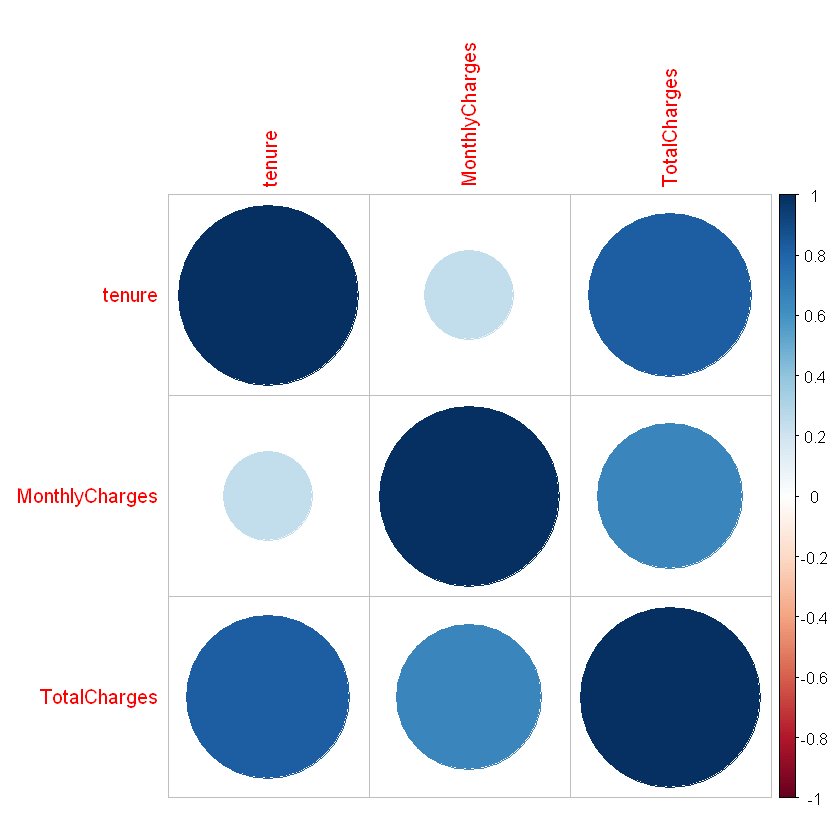

In [17]:
cr <-cor(df[,c(5,18,19)])
corrplot(cr, method="circle")

From the correlation plot, we can see that, "MonthlyCharges" and "TotalCharges" are positively strongly correlated. So, we remive the "TotalCharges" column.

* **One Hot Encoding:**

In this step, we are going to encode our categorical variables which have more than two categories,-

In [20]:
attach(df)
to_dummy <- data.frame(Contract,PaymentMethod)
dmy <- dummyVars(" ~ .", data = to_dummy)
df2 <- data.frame(predict(dmy, newdata = to_dummy))
df2 <- df2[, !(colnames(df2) %in% c("Contract.Month.to.month", "PaymentMethod.Bank.transfer..automatic."))]
df <- df[,!(colnames(df) %in% c("Contract","PaymentMethod","TotalCharges"))]
df <- cbind(df, df2)
head(df)
attach(df)
dim(df)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,Churn,Contract.One.year,Contract.Two.year,PaymentMethod.Credit.card..automatic.,PaymentMethod.Electronic.check,PaymentMethod.Mailed.check
,<fct>,<fct>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,...,<fct>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Female,0,Yes,No,1,No,No,Yes,No,Yes,...,No,No,Yes,29.85,No,0,0,0,1,0
2,Male,0,No,No,34,Yes,No,Yes,Yes,No,...,No,No,No,56.95,No,1,0,0,0,1
3,Male,0,No,No,2,Yes,No,Yes,Yes,Yes,...,No,No,Yes,53.85,Yes,0,0,0,0,1
4,Male,0,No,No,45,No,No,Yes,Yes,No,...,No,No,No,42.30,No,1,0,0,0,0
5,Female,0,No,No,2,Yes,No,Yes,No,No,...,No,No,Yes,70.70,Yes,0,0,0,1,0
6,Female,0,No,No,8,Yes,Yes,Yes,No,No,...,Yes,Yes,Yes,99.65,Yes,0,0,0,1,0


The following objects are masked from df (pos = 3):

    Churn, Dependents, DeviceProtection, gender, InternetService,
    MonthlyCharges, MultipleLines, OnlineBackup, OnlineSecurity,
    PaperlessBilling, Partner, PhoneService, SeniorCitizen,
    StreamingMovies, StreamingTV, TechSupport, tenure




[1] 7043   22

* **Feature Selection:**

We have used **_Best Subset Method_** and **_Bayesian Information Criterion(BIC)_** for selecting the features for our analysis.

[1] "which"  "rsq"    "rss"    "adjr2"  "cp"     "bic"    "outmat" "obj"

[1] 12

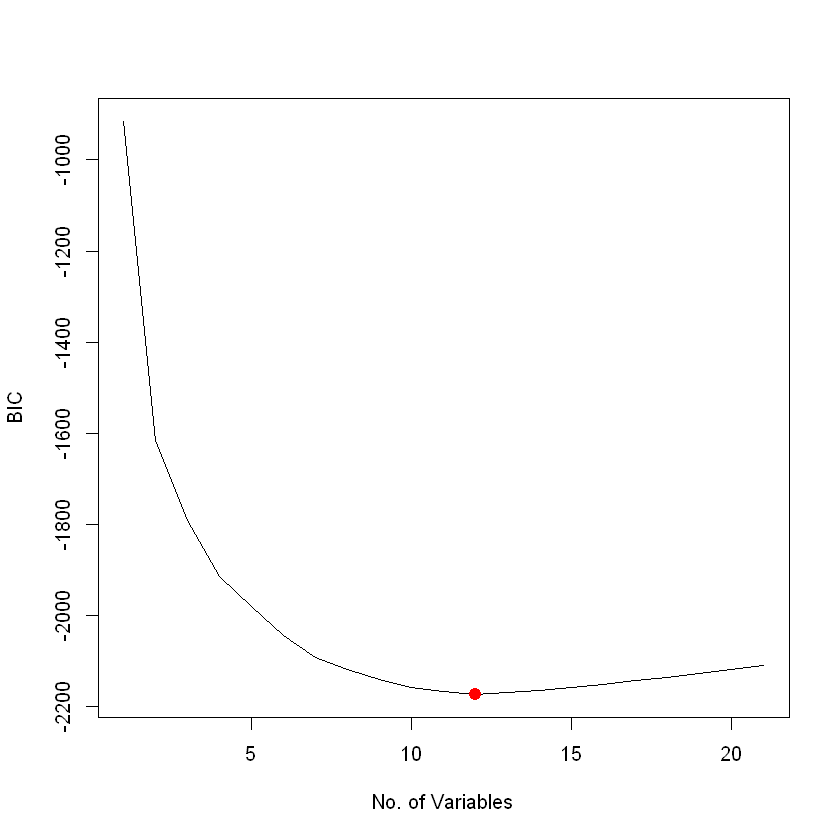

In [22]:
regfit.full=regsubsets(Churn~.,data=df,nvmax=21)
reg.summary=summary(regfit.full)
names(reg.summary)
which.min(reg.summary$bic)
plot(reg.summary$bic,xlab="No. of Variables",ylab=expression(paste("BIC")),type="l")
points(12,reg.summary$bic[12],col="red",cex=2,pch=20)

12 variable model gives the minimum BIC. So, we choose that model. The selected features are as follows,

In [23]:
names(coef(regfit.full,12))[-1]

[1] "SeniorCitizen1"                 "tenure"                        
 [3] "PhoneServiceYes"                "OnlineSecurityYes"             
 [5] "OnlineBackupYes"                "DeviceProtectionYes"           
 [7] "TechSupportYes"                 "PaperlessBillingYes"           
 [9] "MonthlyCharges"                 "Contract.One.year"             
[11] "Contract.Two.year"              "PaymentMethod.Electronic.check"

Now, we are ready with our final dataset for further analysis.

In [24]:
data=df[,-c(1,3,4,7,8,13,14,20,22)]
dim(data)

[1] 7043   13

In our final data, we have 13 columns.

#  Data Analysis:

## Splitting the Data: 

In [25]:
set.seed(2021)
index1=sample(1:nrow(data),floor(0.7*nrow(data)))
train=data[index1,]
remaining=data[-index1,]
index2=sample(1:nrow(remaining),floor(2/3*nrow(remaining)))
crossval=remaining[index2,]
test=remaining[-index2,]
actual_churn=crossval$Churn
print("The data is successfully split into Training, Cross Validation and Test Set")

[1] "The data is successfully split into Training, Cross Validation and Test Set"


In [26]:
f_cfm <- function(x){
  cfm <- as.tibble(x)
  cname <- colnames(cfm)
  print(plot_confusion_matrix(cfm, target_col = cname[2], prediction_col =  cname[1], counts_col = cname[3]))
}
f_bar <- function(pred, act){
  d1 <- as.matrix(data.frame(as.vector(table(pred)), as.vector(table(act))))
  colnames(d1) <- c("Predicted","Actual")
  rownames(d1) <- c("Yes","No")
  barplot(d1, main="Ratio of Yes and No in Predicted and Actual",col=c("pink","cyan"))
  legend("topright",c("No","Yes"),fill=c("pink","cyan")) 
}

# Logistic Regression:

In [45]:
thresholds <- seq(0.1,0.7,0.1)
fscore = array(0)
logistic.predict = matrix('No', ncol = length(thresholds), nrow = nrow(crossval))
for(i in 1:length(thresholds)){
  logistic.fit <- train(Churn~.,data=train,trControl=trainControl(method="cv",number=10)
                     ,method="glm",family="binomial")
  predicted_prob <- predict(logistic.fit,newdata=crossval,type="prob")[,2]
  logistic.predict[,i][predicted_prob>thresholds[i]] <- "Yes"
  temp <- table(logistic.predict[,i], actual_churn)
  prec <- temp[2,2]/(temp[2,2] + temp[2,1])
  recall <- temp[2,2]/(temp[2,2] + temp[1,2])
  fscore[i] <- (2*prec*recall)/(prec + recall)
}
data.frame(thresholds, fscore)
max_acc <- which.max(fscore)
paste("Maximum F1-score is for thresold value of ", thresholds[max_acc], " and is = ",round(fscore[max_acc],4))

thresholds,fscore
<dbl>,<dbl>
0.1,0.5488297
0.2,0.5935357
0.3,0.6006826
0.4,0.5793651
0.5,0.5474006
0.6,0.4641509
0.7,0.2725173


[1] "Maximum F1-score is for thresold value of  0.3  and is =  0.6007"

Since our data is imbalanced, so, instead of using threshold probability 0.5, we calculated **_F-Score_** corresponding to different probabilities and choose that value of the probability for which we get the maximum threshold value.

thresholds,fscore
<dbl>,<dbl>
0.1,0.5488297
0.2,0.5935357
0.3,0.6006826
0.4,0.5793651
0.5,0.5474006
0.6,0.4641509
0.7,0.2725173


[1] "Maximum F-score is for thresold value of  0.3  and is =  0.6007"

[1] "Accuracy of the model is:  0.7507"

                actual_churn
logistic.predict  No Yes
             No  793  91
             Yes 260 264

Warning message in plot_confusion_matrix(cfm, target_col = cname[2], prediction_col = cname[1], :
"'ggimage' is missing. Will not plot arrows and zero-shading."
Warning message in plot_confusion_matrix(cfm, target_col = cname[2], prediction_col = cname[1], :
"'rsvg' is missing. Will not plot arrows and zero-shading."


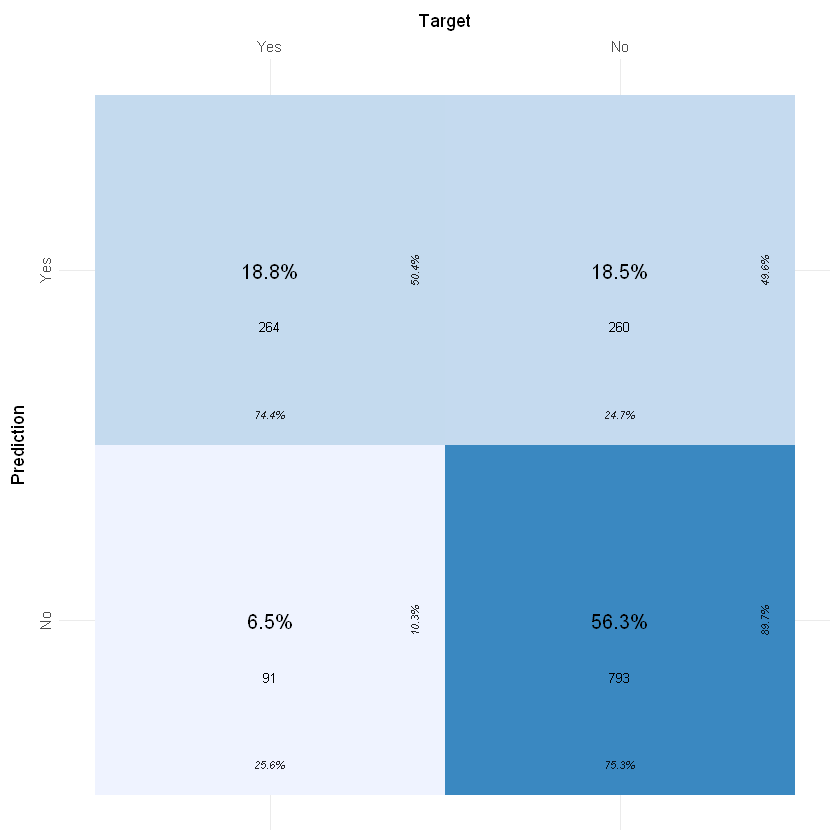

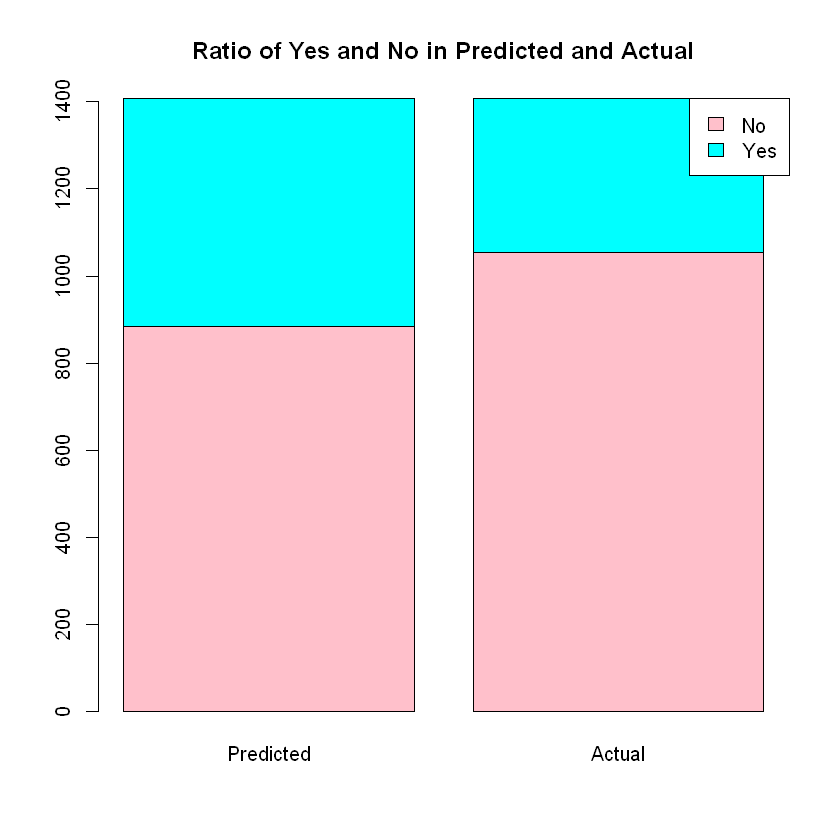

In [46]:
data.frame(thresholds, fscore)
max_acc <- which.max(fscore)
paste("Maximum F-score is for thresold value of ", thresholds[max_acc], " and is = ",round(fscore[max_acc],4))
logistic.predict <- as.vector(logistic.predict[,max_acc])
t1 <- table(logistic.predict, actual_churn)
paste("Accuracy of the model is: ",round(mean(logistic.predict == actual_churn),4))
t1
f_cfm(t1)
f_bar(logistic.predict, actual_churn)

We see that, logistic model can give accurate churn prediction in 75.07% cases.

# Classification Tree:

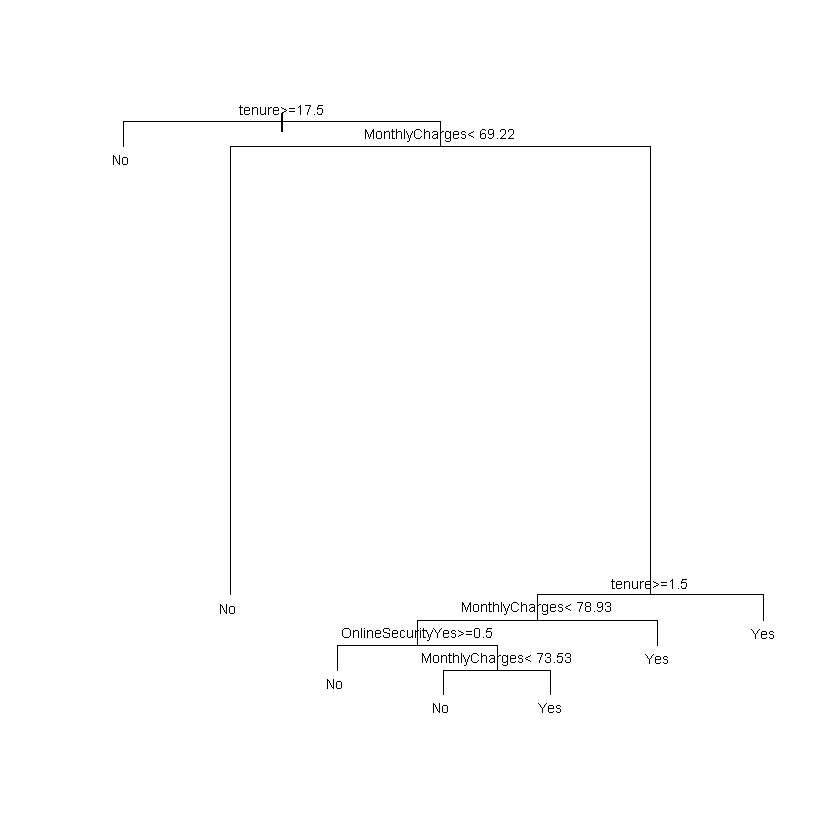

In [47]:
set.seed(2021)
tree.fit=train(Churn~.,data=train,trControl=trainControl(method="cv",number=10)
               ,method="rpart")
plot(tree.fit$finalModel)
text(tree.fit$finalModel,pretty=0,cex=0.7)

Here we can see that, "Tenure","MonthlyCharges","OnlineSecurityYes" are used to predict whether a customer will churn or not.

               actual_churn
predicted_churn  No Yes
            No  978 241
            Yes  75 114

Warning message in plot_confusion_matrix(cfm, target_col = cname[2], prediction_col = cname[1], :
"'ggimage' is missing. Will not plot arrows and zero-shading."
Warning message in plot_confusion_matrix(cfm, target_col = cname[2], prediction_col = cname[1], :
"'rsvg' is missing. Will not plot arrows and zero-shading."


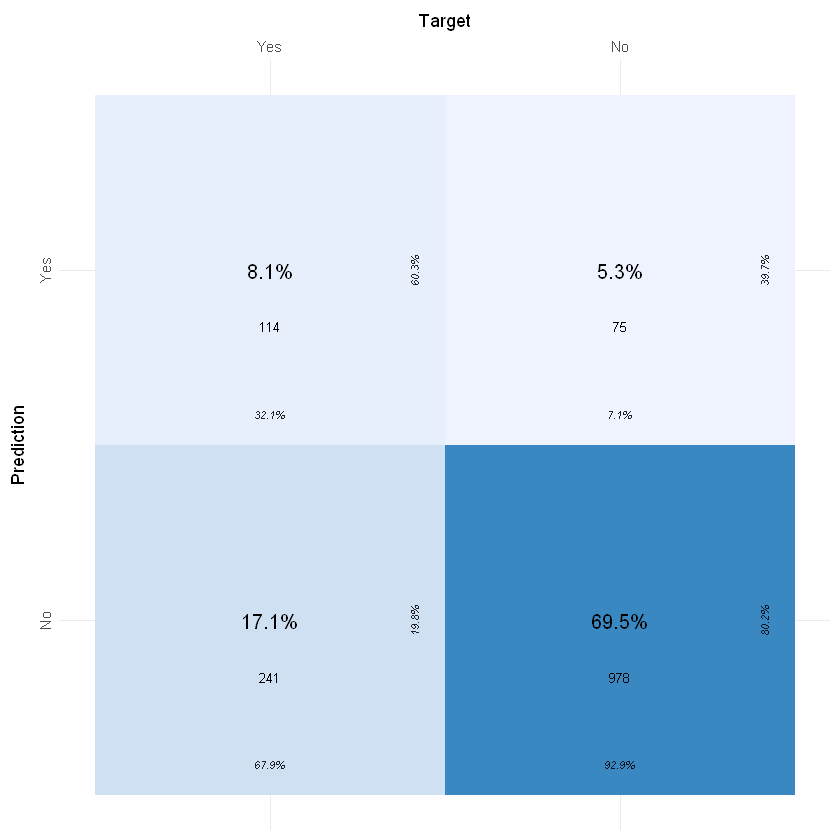

[1] 0.7756

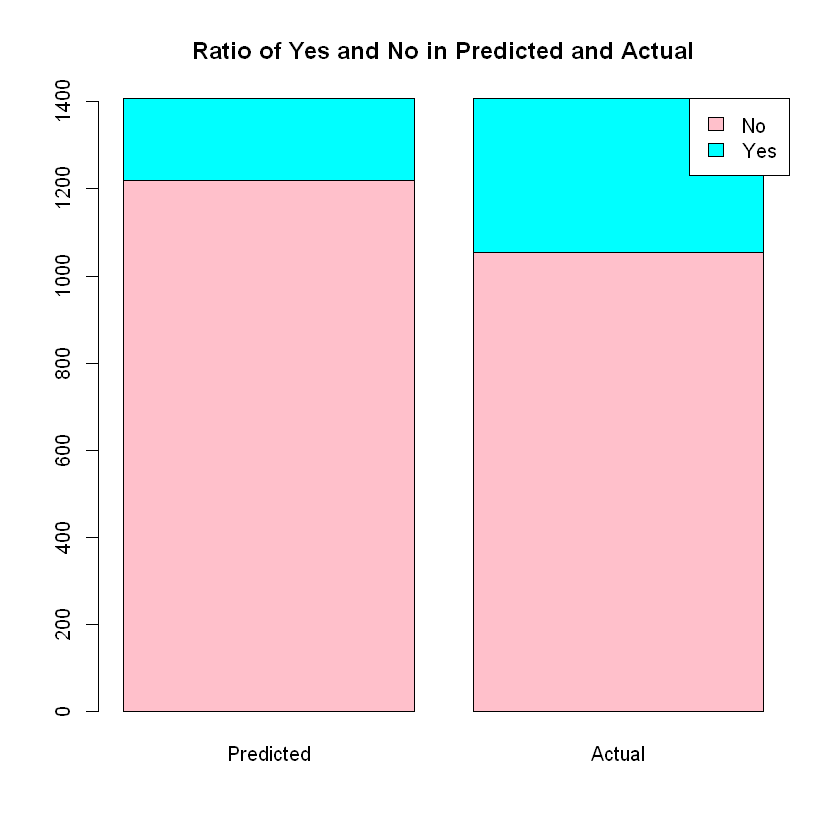

In [48]:
tree.predict=predict(tree.fit,crossval)
t2 <- table(predicted_churn=tree.predict,actual_churn)
t2
f_cfm(t2)
f_bar(tree.predict, actual_churn)
round(mean(tree.predict==actual_churn),4)

We see that, logistic model can give accurate churn prediction in 75.07% cases, which is better than logistic regression.

## Random Forest:

               actual_churn
predicted_churn  No Yes
            No  971 201
            Yes  82 154

Warning message in plot_confusion_matrix(cfm, target_col = cname[2], prediction_col = cname[1], :
"'ggimage' is missing. Will not plot arrows and zero-shading."
Warning message in plot_confusion_matrix(cfm, target_col = cname[2], prediction_col = cname[1], :
"'rsvg' is missing. Will not plot arrows and zero-shading."


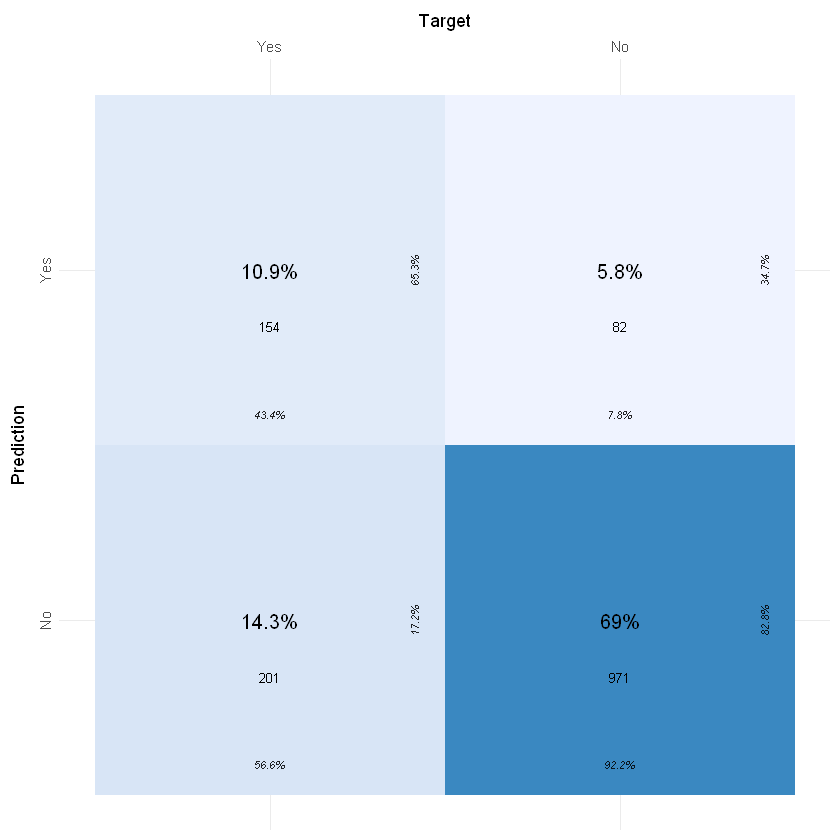

[1] 0.799

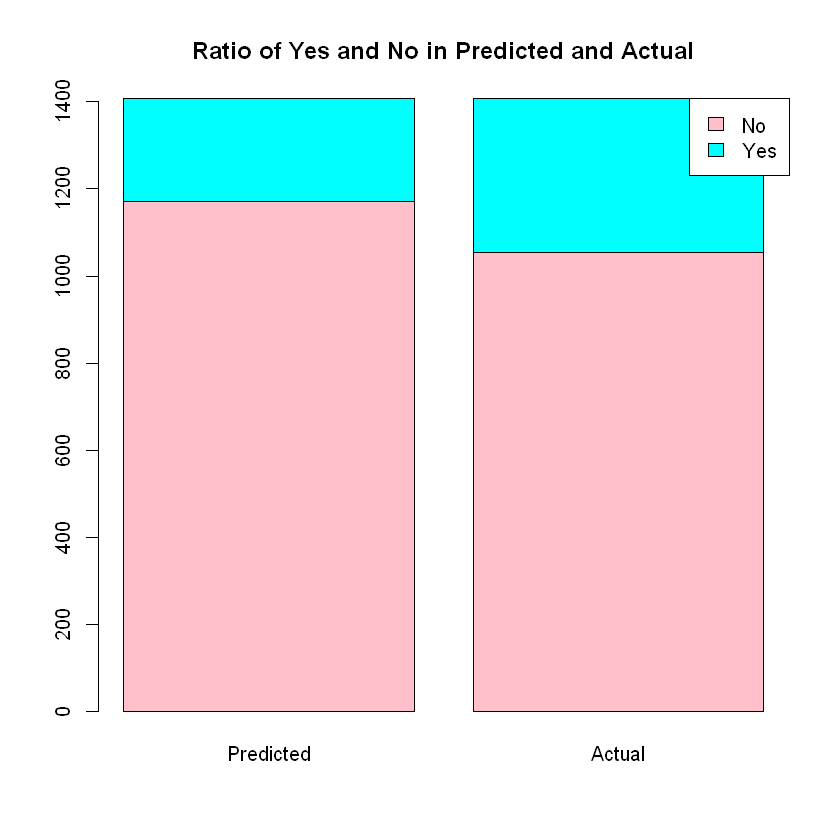

In [50]:
rf.fit=train(Churn~.,data=train,trControl=trainControl(method="cv",number=10) ,method="rf")
rf.predict=predict(rf.fit,crossval)
t3 <- table(predicted_churn=rf.predict,actual_churn)
t3
f_cfm(t3)
f_bar(rf.predict, actual_churn)
round(mean(rf.predict==actual_churn),4)

We see that, Random Forest can give accurate churn prediction in 79.9% cases, which is the best among the three fitted models.

## Support Vector Machine(SVM):

In [51]:
set.seed(2021)
tune.out=tune(svm, Churn~., data = train, kernel = "radial", ranges = list(cost = c(0.1, 1, 5, 10), gamma = c(0.01, 0.1, 1, 5, 10, 100)))
summary(tune.out)


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
 cost gamma
    1   0.1

- best performance: 0.1947262 

- Detailed performance results:
   cost gamma     error  dispersion
1   0.1 1e-02 0.2387424 0.021467607
2   1.0 1e-02 0.1977688 0.012513019
3   5.0 1e-02 0.1975659 0.010868712
4  10.0 1e-02 0.1957404 0.009668931
5   0.1 1e-01 0.2062880 0.012866075
6   1.0 1e-01 0.1947262 0.010561528
7   5.0 1e-01 0.1971602 0.010682038
8  10.0 1e-01 0.1971602 0.012275111
9   0.1 1e+00 0.2123732 0.013456566
10  1.0 1e+00 0.1991886 0.014837990
11  5.0 1e+00 0.2221095 0.017818369
12 10.0 1e+00 0.2255578 0.019591516
13  0.1 5e+00 0.2407708 0.015655060
14  1.0 5e+00 0.2158215 0.008980099
15  5.0 5e+00 0.2227181 0.012496568
16 10.0 5e+00 0.2251521 0.011981099
17  0.1 1e+01 0.2462475 0.016622412
18  1.0 1e+01 0.2172414 0.010879222
19  5.0 1e+01 0.2241379 0.012254611
20 10.0 1e+01 0.2255578 0.013068786
21  0.1 1e+02 0.2594320 0.014858003
22  1.0 1e+02 0.2304260 0

After performing cross validation using tune() we can see that the best choice of parameters involves cost=1 and gamma=2. We use these values for prediction purpose

               actual_churn
predicted_churn  No Yes
            No  946 189
            Yes 107 166

Warning message in plot_confusion_matrix(cfm, target_col = cname[2], prediction_col = cname[1], :
"'ggimage' is missing. Will not plot arrows and zero-shading."
Warning message in plot_confusion_matrix(cfm, target_col = cname[2], prediction_col = cname[1], :
"'rsvg' is missing. Will not plot arrows and zero-shading."


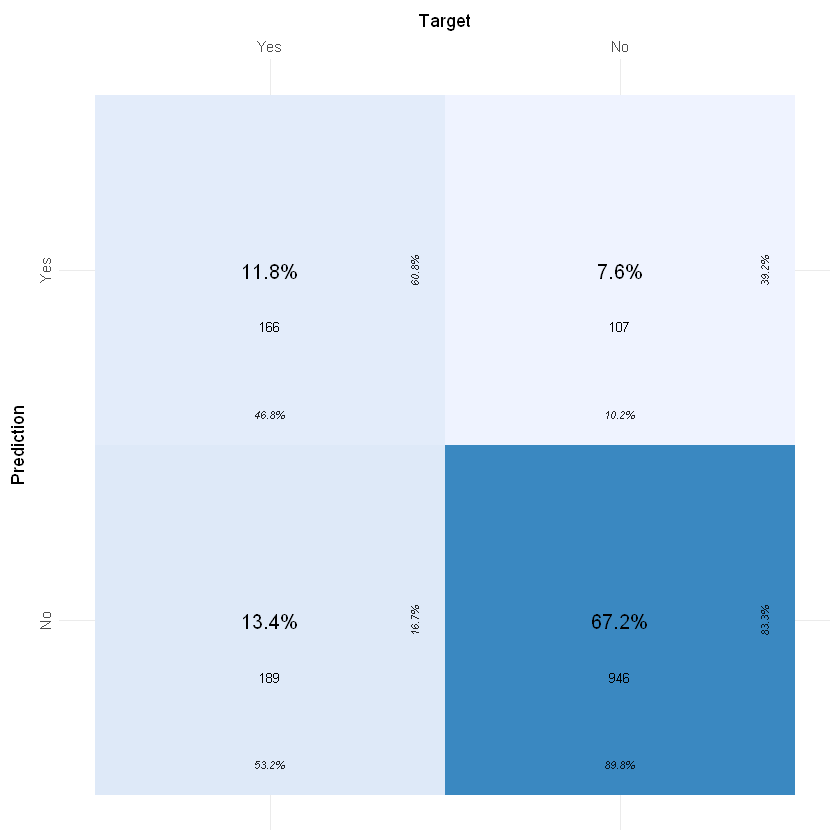

[1] 0.7898

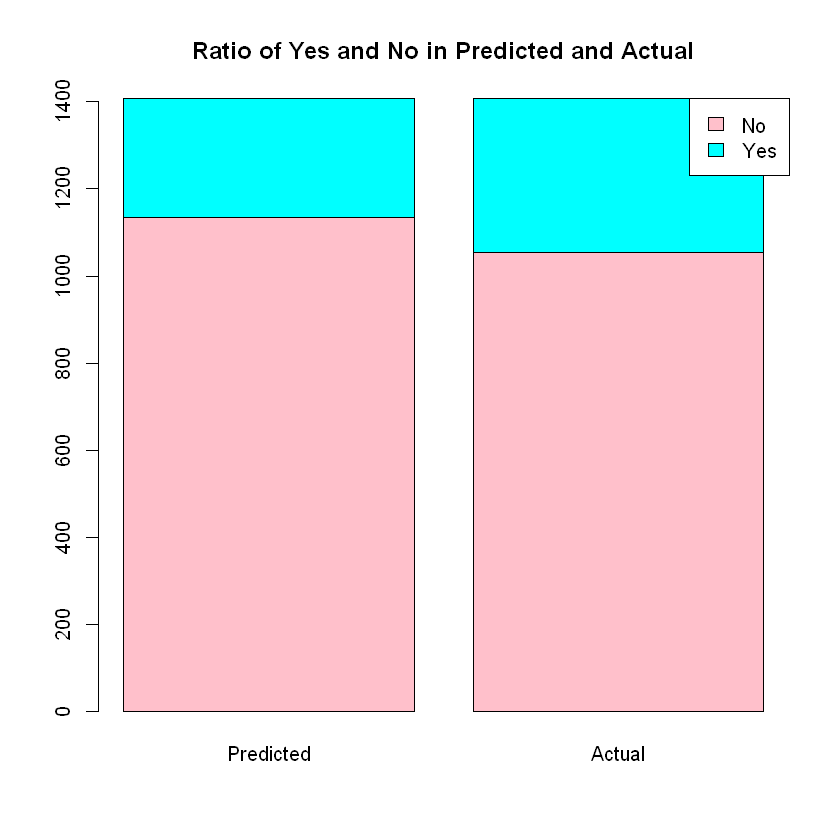

In [52]:
svm.fit=svm(Churn~.,data=train,kernel="radial",gamma=0.1,cost=1)
svm.predict=predict(svm.fit,crossval)
t4 <- table(predicted_churn=svm.predict,actual_churn)
t4
f_cfm(t4)
f_bar(svm.predict, actual_churn)
round(mean(svm.predict==actual_churn),4)

We see that, SVM can give accurate churn prediction in 78.98% cases, which is the better than logistic regression and classification tree but worse than random forest.

#  Choice of Best Model:

We have used **_Misclassification Error Rate_** to choose the optimum model that we are going to use for future prediction purpose.

In [53]:
misclassification_rate_logistic=(mean(logistic.predict!=actual_churn))*100
misclassification_rate_tree=(mean(tree.predict!=actual_churn))*100
misclassification_rate_forest=(mean(rf.predict!=actual_churn))*100
misclassification_rate_svm=(mean(svm.predict!=actual_churn))*100
paste("Misclassification Error Rate for Logistic Regression is",round(misclassification_rate_logistic,2),"%")
paste("Misclassification Error Rate for Decision Tree is",round(misclassification_rate_tree,2),"%")
paste("Misclassification Error Rate for Random Forest is",round(misclassification_rate_forest,2),"%")
paste("Misclassification Error Rate for SVM is",round(misclassification_rate_svm,2),"%")

[1] "Misclassification Error Rate for Logistic Regression is 24.93 %"

[1] "Misclassification Error Rate for Decision Tree is 22.44 %"

[1] "Misclassification Error Rate for Random Forest is 20.1 %"

[1] "Misclassification Error Rate for SVM is 21.02 %"

We can see that, **_Random Forest_** produces the lowest **_Misclassification Error Rate_** when applied on **_Cross Validation Set_**. So, we will use this model for future prediction.

#  Fitting the selected model (Random Forest) on Test Set:

               actual.churn.test
rf.predict.test  No Yes
            No  462  98
            Yes  48  97

Warning message in plot_confusion_matrix(cfm, target_col = cname[2], prediction_col = cname[1], :
"'ggimage' is missing. Will not plot arrows and zero-shading."
Warning message in plot_confusion_matrix(cfm, target_col = cname[2], prediction_col = cname[1], :
"'rsvg' is missing. Will not plot arrows and zero-shading."


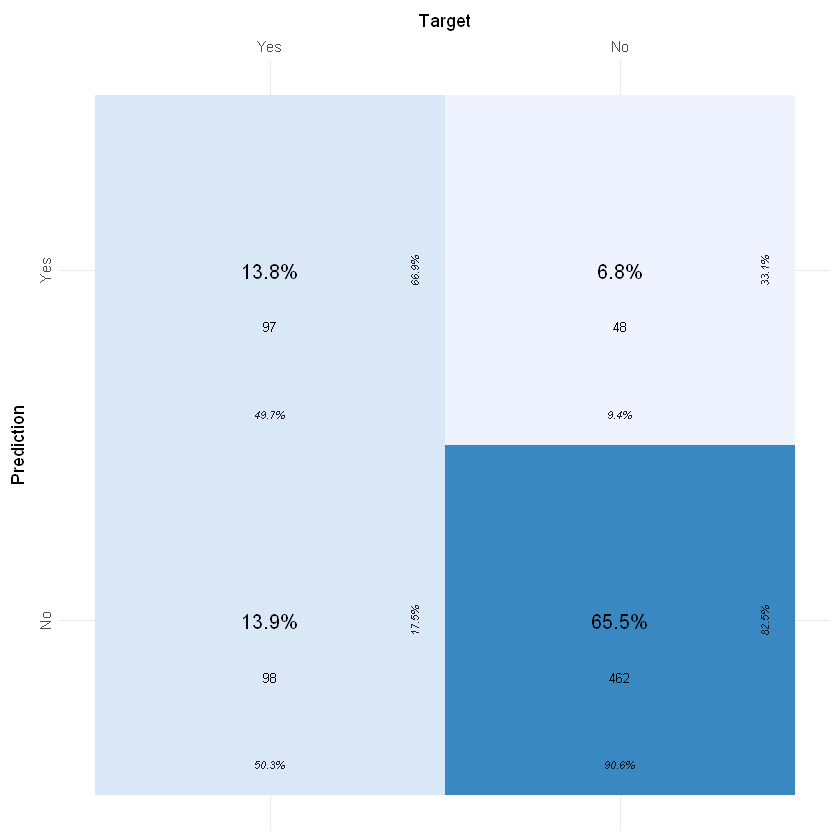

[1] "Misclassification Error Rate for final model is 20.71 %"

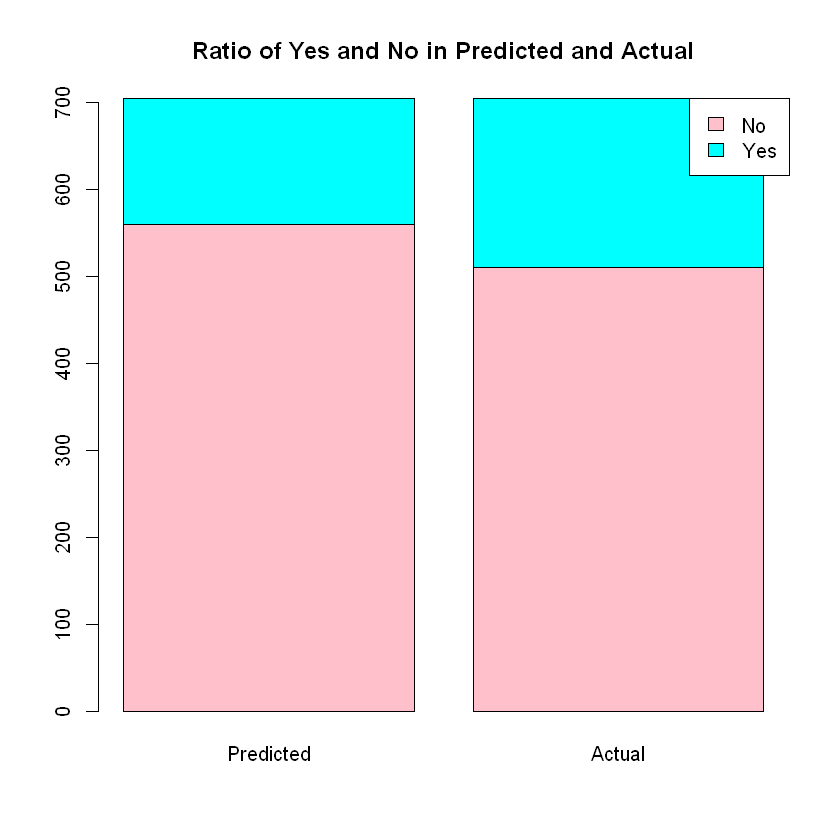

In [55]:
actual.churn.test=test$Churn
rf.predict.test=predict(rf.fit,test)
t5 <- table(rf.predict.test,actual.churn.test)
t5
f_cfm(t5)
f_bar(rf.predict.test, actual.churn.test)
misclassification.final=mean(rf.predict.test!=actual.churn.test)*100
paste("Misclassification Error Rate for final model is",round(misclassification.final,2),"%")

We have also used ROC curve and the area under the curve to assess the final model accuracy.

Setting levels: control = No, case = Yes

Setting direction: controls < cases



[1] "Area under the curve is 0.84"

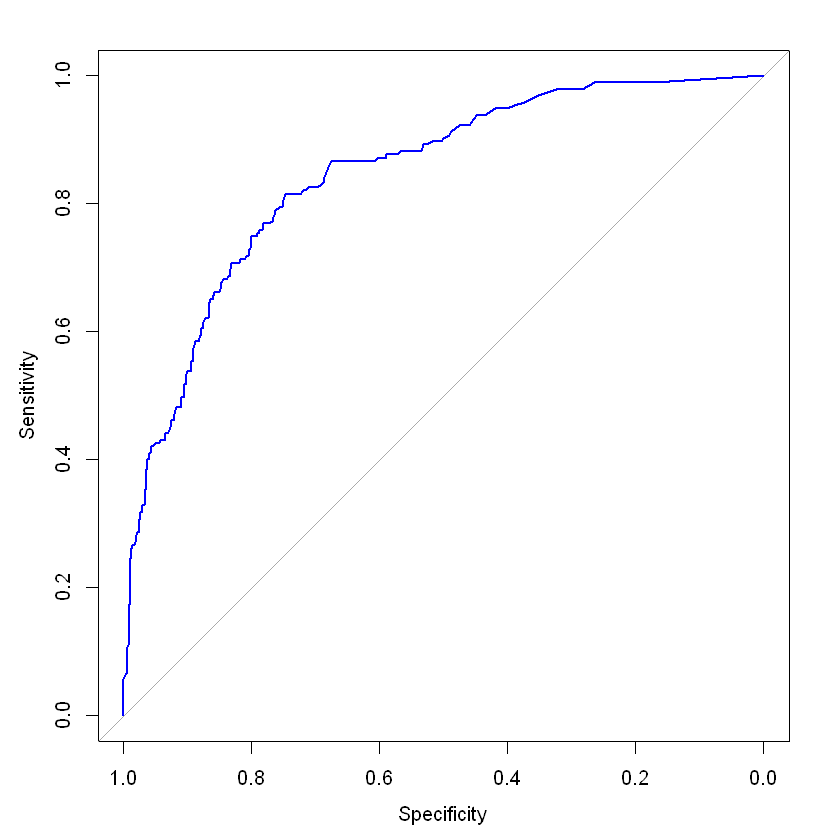

In [58]:
rf.predict=predict(rf.fit,test,type="prob")
ROC=roc(test$Churn, rf.predict[,2])
plot(ROC,col="blue")
paste("Area under the curve is",round(auc(ROC),2))

We can see that the area under the curve is 0.84 which is close to 1, which indicates the model performance on new data is pretty good.

#  Conclusion:

From our above analysis, we can see that **Logistic Regression**, **Classification Tree**, **Random Forest**, **SVM** can be used to predict whether a customer will churn or not. Among these classifiers, **Random Forest** gives the best performance, so it will be beneficial to use this model.

Customer churn analysis allows to minimize acquisition costs and increase marketing efficiency, preparing a solid base for future marketing analysis and campaigns. Customer churn analysis opens new opportunities for cross-selling and upselling and serves as one of the starting points for customer-driven product development, keeping customers engaged and loyal over time.